**Aim of the Project** Aim of the project is to Detection Of COVID-19 From Chest X-Rays, artificial intelligence in medicine is to provide composite, panoramic views of individuals’ medical data; to improve decision making, avoid errors such as misdiagnosis and unnecessary procedures, help in the ordering and interpretation of appropriate tests, and recommend treatment

**Background** It is a machine learning (ML) algorithm that tries to learn the features by itself. In simple words, ML is a subset of artificial intelligence (AI) and involves the study of computer algorithms that improve automatically using experience. A branch of machine learning, deep learning utilizes multilayer artificial neural networks inspired by the neurons (basic working unit) in the human brain. A deep neural network analyzes data (with learned representations) similar to the ways by which any of us would look at a complex problem..

**Business Requirement** Basically, here we are giving a number of chest x-ray images (examples — training data) to the machine and we inform it whether they indicate that the person is normal/ healthy or do they have possible COVID-19 traits. With more and more examples, the machine learns the relevant features. Now, if we give it a new chest x-ray, it tries to predict whether it is normal or does it have SARS-CoV-2 infection

**Suggested Approach** This model uses 12 layers of a neural network and has the advantage of learning the disease diagnosing features from x-ray images in an automatic manner. Utilizing the right combinations of algorithms and data, this tool is useful in terms of its rapidness and reliability. Moreover, it can further be trained and made available for wider use by the public

**Sources of Input**
The data available in the public domain was used to develop this tool. This information consisted of the normal chest x-ray features as well as those of other lung diseases such as pneumonia, tuberculosis, and so forth. As of now, there are a few examples (images) that are publically available for COVID-19. The researchers pooled all this data from different sources available on the Internet.

**Disclaimer **
Use only standard X-ray images.
It is an AI diagnose CVD-19 detector which works on only chest X-Ray.
Our model has 2049 distinct images from 1800 distinct patients, 708 COVID-19 images, Heathy patients XRay images, with this information our model is 95% accurate.
The intention of CVD-19 Detector is to be used as a reference model that can be built upon and enhanced as new data becomes available. We are currently at a research stage and not yet intended as production-ready models. It means we are not saying people to use as a direct clinical diagnosis. We are working continuously to improve our model as new data becomes available. Please do not use this model for self-diagnosis and seek help from your local health authorities.

#Mount the Google Drive to Google Colab


In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


#Downloading the dataset directly to Google Drive via Google Colab
Import the required libraries and dataset
#Path for covid19-radiography-database


In [3]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from zipfile import ZipFile
datasetdir = "/content/drive/My Drive/COVID-19 Radiography Database/COVID-19 Radiography Database"

## Preparing data for CNN
COVID-19 Radiography Database(3 directories, 4 files)


**About this directory**
Database of chest X-ray images for COVID-19 positive cases along with Normal and Viral Pneumonia images.In our current realease, there are 219 COVID-19 positive images, 1341 normal images and 1345 viral pneuomonia images. We will continue to update this database as soon as we have new x-ray images for COVID-19 pneumonia patients. Main objective is to researchers can use this database to produce useful and impactful scholarly work on COVID-19, which can help in tackling this pandemic.

In [4]:
os.listdir(datasetdir)

['COVID-19',
 'NORMAL',
 'Viral Pneumonia',
 'COVID-19.metadata.xlsx',
 'NORMAL.metadata.xlsx',
 'README.md.txt',
 'Viral Pneumonia.matadata.xlsx']

###Sample image for  “normal” (i.e., not infected) X-ray images from healthy patients.
###Load normal Images from Data set dir 
### we keep 280 images since there are only 219+58 images of covid-19, then the distribution of classes can be balanced.
### plot the first normal lung images from the dataset

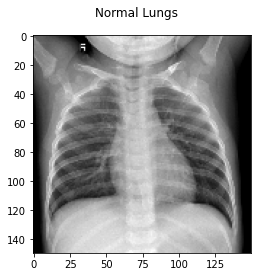

In [5]:
import glob
from tensorflow.keras.preprocessing import image
normal_images = []
count = 0
#Load normal Images from Data set dir 
for img_path in glob.glob(datasetdir + "/NORMAL/*"):
    count += 1
    normal_images.append(image.load_img(str(img_path), target_size = (150,150,3)))
    if count > 280:
        break
    
fig = plt.figure()
fig.suptitle("Normal Lungs")
plt.imshow(normal_images[0], cmap="gray")
plt.show()



###Sample X-ray images for patients who have tested positive for COVID-19
###Load Covid-19 Images from Data set dir 
### we keep 280 images since there are only 219+58 images of covid-19, then the distribution of classes can be balanced.
###plot the first image of covid-19 infection.

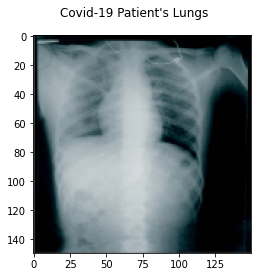

In [6]:
covid_images = []
count = 0
for img_path in glob.glob(datasetdir  + "/COVID-19/*"):
    count += 1 
    covid_images.append(image.load_img(str(img_path), target_size = (150,150,3)))
    if count > 280:
        break   
fig = plt.figure()
fig.suptitle("Covid-19 Patient's Lungs ")
plt.imshow(covid_images[0], cmap = "gray")
plt.show()

###Sample X-ray images for patients who have tested positive for Pneumonia
###Load pneumonia Images from Data set dir 
### we keep 280 images since there are only 219+58 images of covid-19, then the distribution of classes can be balanced.
### plot the first Viral Pneumonia image.

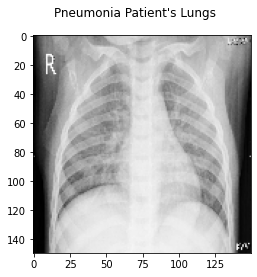

In [7]:
pneumonia_images = []
count = 0
for img_path in glob.glob(datasetdir  + "/Viral Pneumonia/*"):
    count += 1  
    pneumonia_images.append(image.load_img(str(img_path), target_size = (150,150,3)))
    if count > 280:
        break   
fig = plt.figure()
fig.suptitle("Pneumonia Patient's Lungs ")
plt.imshow(pneumonia_images[1], cmap = "gray")
plt.show()

In [8]:
print(str(len(normal_images))+" normal patient images")
print(str(len(covid_images))+" covid patient images")
print(str(len(pneumonia_images))+" pneumonia patient images")

281 normal patient images
219 covid patient images
281 pneumonia patient images


###All Images Together 
### normal-> 0,
###covid-19-> 1,
### pneumonia-> 2

In [10]:
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
images_together = []

for i in normal_images:
    images_together.append(img_to_array(i))
    
for i in covid_images:
    images_together.append(img_to_array(i))
    
for i in pneumonia_images:
    images_together.append(img_to_array(i))

# normal-> 0, covid-19-> 1, pneumonia-> 2
targets = np.zeros((len(images_together), 3), int)
targets[:len(normal_images)] = [1, 0, 0]
targets[len(normal_images):] = [0, 1, 0]
targets[len(normal_images)+len(covid_images):] = [0, 0, 1]

###Display the image list and target list length

In [11]:
print("image list length: ",len(images_together))
print("target list length: ",len(targets))

image list length:  781
target list length:  781


###Display Target shape

In [12]:
targets = np.array(targets)
print("targets: ",targets.shape)

targets:  (781, 3)


### Look at the shape of the images Together

In [13]:
images_together = np.array(images_together)
print("shape of images together: ",images_together.shape)

shape of images together:  (781, 150, 150, 3)


#### Re-construct the dataset to meet the input dimensions.

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(images_together, targets, test_size=0.2, stratify=targets)

images_together = np.concatenate((X_train, X_val))
targets = np.concatenate((y_train, y_val))

### Define HyperParameters

In [17]:
input_shape = (150, 150, 3)
num_classes = 3
epochs = 32
batch_size = 40

#Build Basic CNN Model

In [18]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.optimizers import Adam, SGD, RMSprop
import tensorflow as tf 
from tensorflow.keras.preprocessing import image
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = input_shape, activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 48, kernel_size = (3,3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2), strides = (1,1)))
model.add(Dropout(0.25))

#fully connected
model.add(Flatten())
model.add(Dense(32, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(3, activation = "softmax"))

# compile 
model.compile(loss = "categorical_crossentropy",
             optimizer = "rmsprop",
             metrics = ["accuracy"])

#Model Summary 

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 48)        13872     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        27712     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 33, 33, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 33, 33, 64)        0

#Model Training

In [21]:
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### Create iterable training set with Data Augmentation methodologies such as rescale, shear, zoom and filp the data.

In [22]:

train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,
                                  validation_split = 0.2)

# Training iterable
# validation iterable
##Train the model using GPU acceleration

In [23]:
train_generator = train_datagen.flow(
images_together, targets,
batch_size = batch_size,
subset = "training")


validation_generator = train_datagen.flow(
images_together, targets,
batch_size = batch_size,
shuffle = False,
subset = "validation")


with tf.device('/GPU:0'):
    hist = model.fit_generator(
    train_generator,
    steps_per_epoch = (450*0.8)//batch_size,
    validation_data = validation_generator,
    validation_steps = (450*0.2)// batch_size,
    epochs = epochs)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/32
9/9 [==============================] - 3s 283ms/step - loss: 1.7745 - accuracy: 0.3306 - val_loss: 1.0961 - val_accuracy: 0.3000
Epoch 2/32
9/9 [==============================] - 2s 258ms/step - loss: 1.0896 - accuracy: 0.3639 - val_loss: 1.1078 - val_accuracy: 0.3125
Epoch 3/32
9/9 [==============================] - 2s 268ms/step - loss: 1.0891 - accuracy: 0.3667 - val_loss: 1.0692 - val_accuracy: 0.3125
Epoch 4/32
9/9 [==============================] - 2s 249ms/step - loss: 1.0997 - accuracy: 0.3681 - val_loss: 1.1207 - val_accuracy: 0.4000
Epoch 5/32
9/9 [==============================] - 2s 257ms/step - loss: 1.0749 - accuracy: 0.3942 - val_loss: 1.1310 - val_accuracy: 0.3500
Epoch 6/32
9/9 [==============================] - 2s 257ms/step - loss: 0.9616 - accuracy: 0.4841 - val_loss: 0.9585 - val_accuracy: 0.4875
Epoch 7/32
9/9 [==============================] - 2s 260ms/step - loss: 0.9070 - acc

# plot the model accuracy changes through training

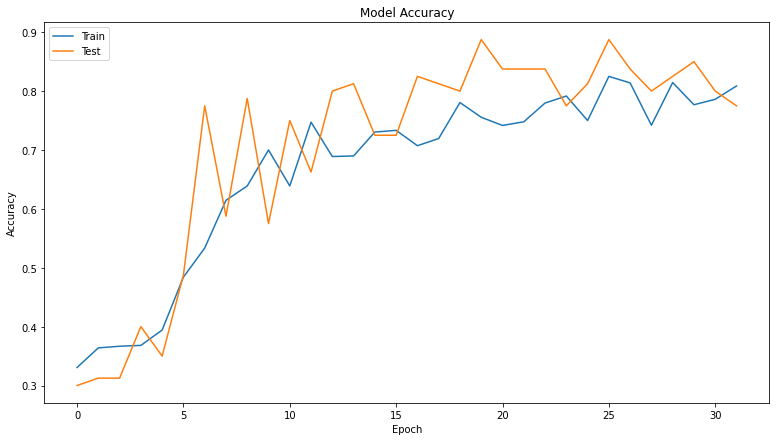

In [24]:
plt.figure(figsize = (13,7))
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper left")
#plt.text(23,0.5,"Current Training Accuracy: "+str(np.round(hist.history["accuracy"][-1]*100,2))+"%",fontsize = 18,color = "black")
#plt.text(23,0.46,"Current Validation Accuracy: "+str(np.round(hist.history["val_accuracy"][-1]*100,2))+"%",fontsize = 18,color = "black")
plt.show()

#Display Training and Validation Accuracy

In [25]:
print("Training Accuracy: "+str(np.round(hist.history["accuracy"][-1]*100,2))+"%")
print("Validation Accuracy: "+str(np.round(hist.history["val_accuracy"][-1]*100,2))+"%")

Training Accuracy: 80.87%
Validation Accuracy: 77.5%
